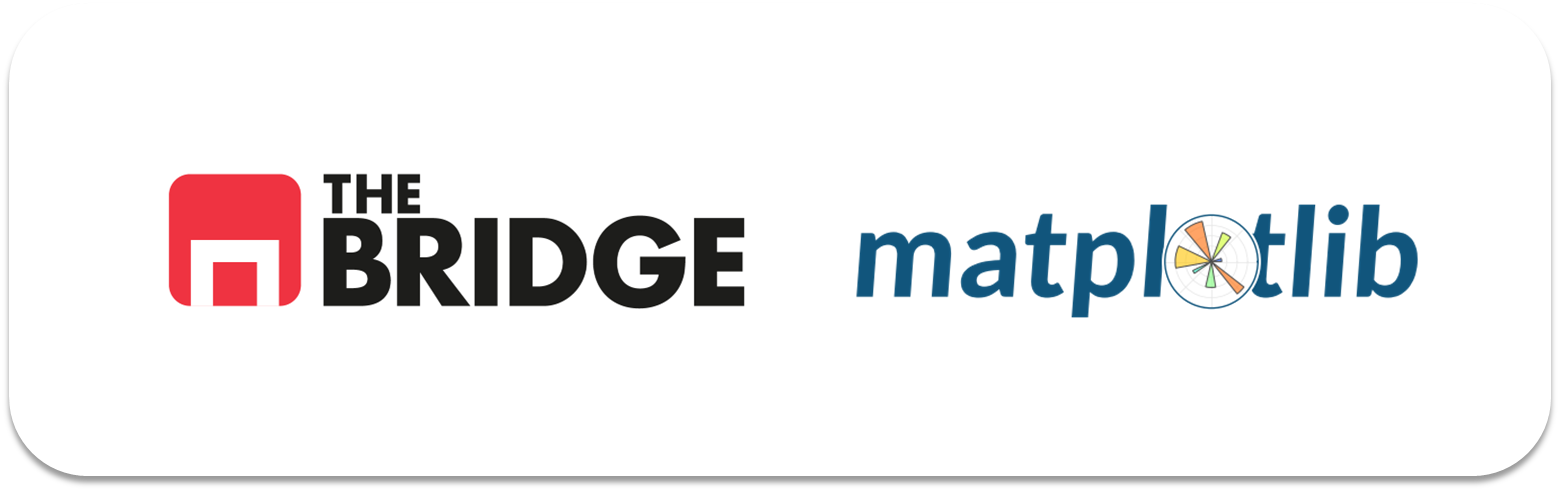

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

plt.style.use("seaborn-v0_8-whitegrid")

import pandas as pd

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [5]:
california = pd.read_csv("./data/california_cities.csv")
californiabu=california
california.head(2)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37


In [6]:
california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [10]:
california = californiabu
california = california.dropna()

california.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

Text(0, 0.5, 'Habitantes (miles)')

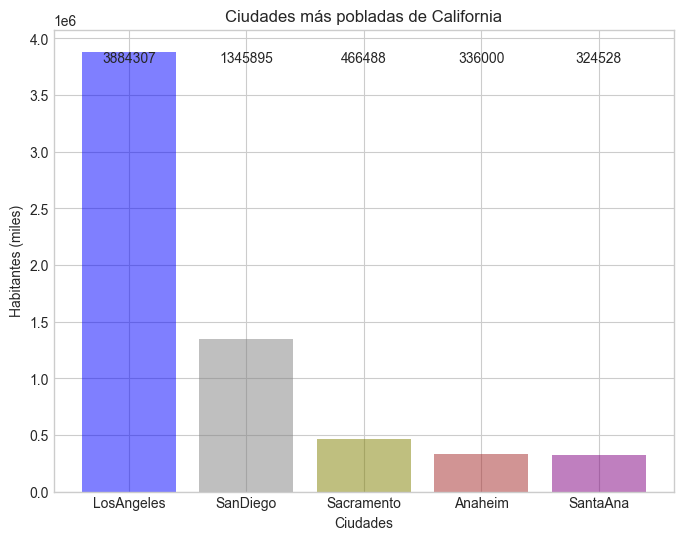

In [55]:
# 1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)

top_5 = california.groupby("city")["population_total"].sum().sort_values(ascending=False).head(5)
#print(top_5)

ciudades = top_5.index.tolist()
poblaciones = top_5.tolist()

plt.figure(figsize=(8, 6))
plt.bar(ciudades, poblaciones, color=['blue', 'gray', 'olive', 'brown', 'purple'], alpha=0.5)

#No queda cuadrada la etiqueta de valor de población:
for bar, poblacion in zip(bars, poblaciones):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + max(poblaciones), str(poblacion), ha='center', va='top')


plt.title("Ciudades más pobladas de California")
plt.xlabel("Ciudades")
plt.ylabel("Habitantes (miles)")



(<matplotlib.legend.Legend at 0x2a7ba60fac0>,)

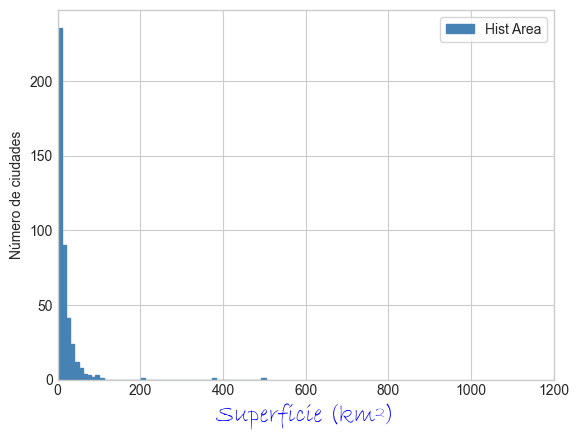

In [84]:
#2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)

sq = california["area_total_sq_mi"].values

plt.hist(sq, bins=50, 
         color="steelblue", edgecolor="steelblue");

plt.xlim(0,1200)


plt.xlabel("Superficie (km²)", fontdict={"fontname": "Bradley Hand ITC", "fontsize": 18, "color": "blue"})
plt.ylabel("Número de ciudades")
plt.legend(["Hist Area"], loc="upper right", frameon=True),




KeyError: 2

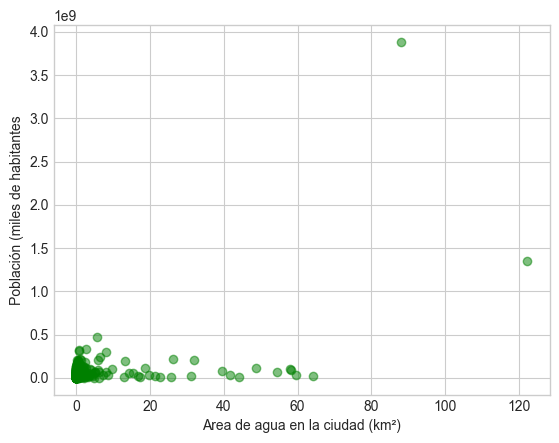

In [85]:
#3. El scatter de área de agua de un ciudad con su poblacion.
x = california["area_water_km2"];
y = california["population_total"]*1000;


plt.scatter(x, y, c="green", alpha=0.5)
plt.xlabel("Area de agua en la ciudad (km²)")
plt.ylabel("Población (miles de habitantes")


props_flecha = {
    "arrowstyle": "<->",
    "connectionstyle": "angle3"
}



Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
outliers = (x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))


for i in range(len(x)):
    if outliers[i]:
        plt.annotate("Outlier", (x[i], y[i]), textcoords="offset points", xytext=(5,5), ha='center', arrowprops=props_flecha)


Text(0.5, 0, 'Altitud (m2)')

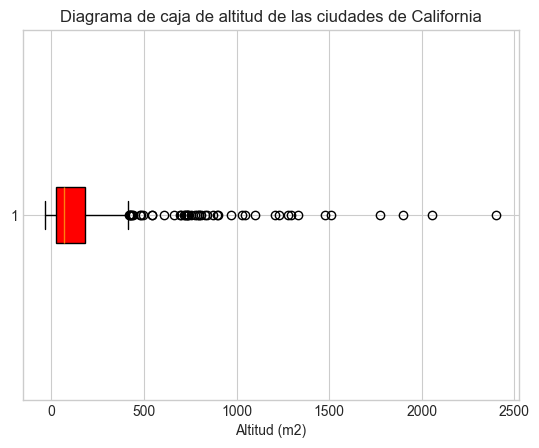

In [97]:
#4. El boxplot de la altura de las ciudades.

elevation= california["elevation_m"].values 

plt.boxplot(elevation,whis=1.5, vert=False,patch_artist=True,
            boxprops={'color': 'black', 'edgecolor': 'black', 'facecolor': 'red'})


plt.title("Diagrama de caja de altitud de las ciudades de California")
plt.xlabel("Altitud (m2)")


Text(0.5, 0, 'Altitud (m2)')

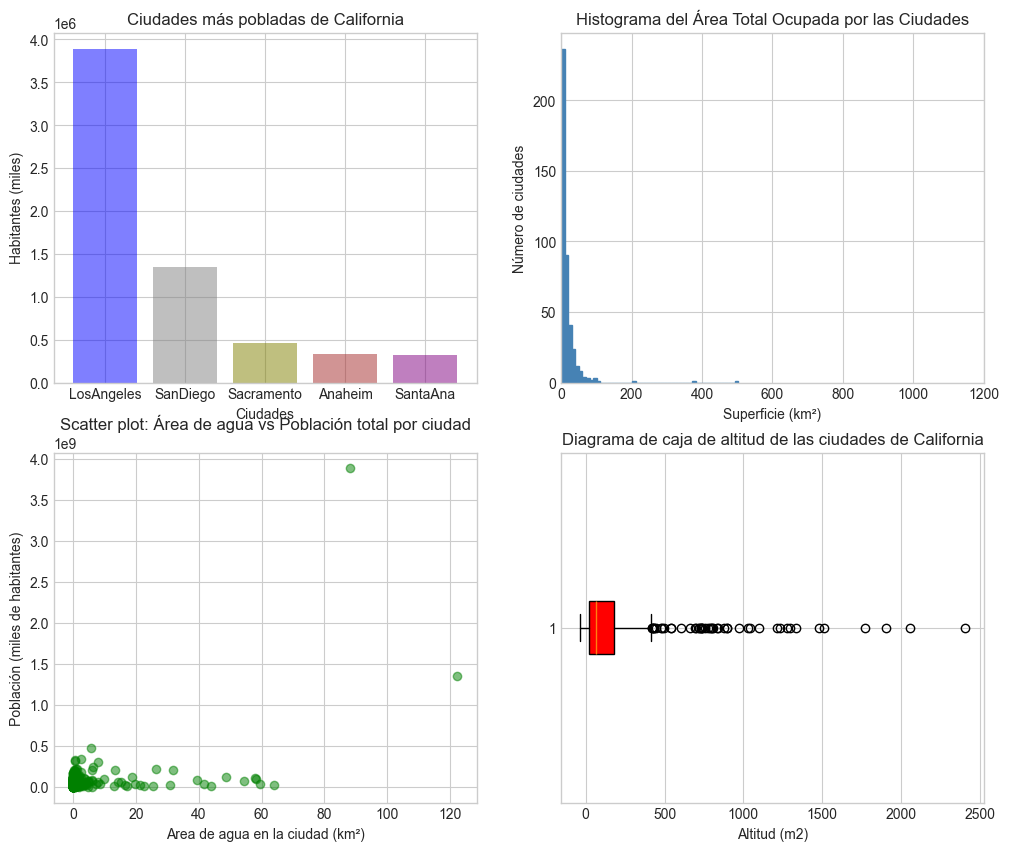

In [105]:
# Agrupar los 4 
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].bar(ciudades, poblaciones, color=['blue', 'gray', 'olive', 'brown', 'purple'], alpha=0.5)
axs[0, 0].set_title("Ciudades más pobladas de California")
axs[0, 0].set_xlabel("Ciudades")
axs[0, 0].set_ylabel("Habitantes (miles)")

axs[0, 1].hist(sq, bins=50, color="steelblue", edgecolor="steelblue")
axs[0, 1].set_xlim(0, 1200)
axs[0, 1].set_xlabel("Superficie (km²)")
axs[0, 1].set_ylabel("Número de ciudades")
axs[0, 1].set_title("Histograma del Área Total Ocupada por las Ciudades")

axs[1, 0].scatter(x, y, c="green", alpha=0.5)
axs[1, 0].set_xlabel("Area de agua en la ciudad (km²)")
axs[1, 0].set_ylabel("Población (miles de habitantes)")
axs[1, 0].set_title("Scatter plot: Área de agua vs Población total por ciudad")

axs[1, 1].boxplot(elevation, whis=1.5, vert=False, patch_artist=True,
                  boxprops={'color': 'black', 'edgecolor': 'black', 'facecolor': 'red'})
axs[1, 1].set_title("Diagrama de caja de altitud de las ciudades de California")
axs[1, 1].set_xlabel("Altitud (m2)")




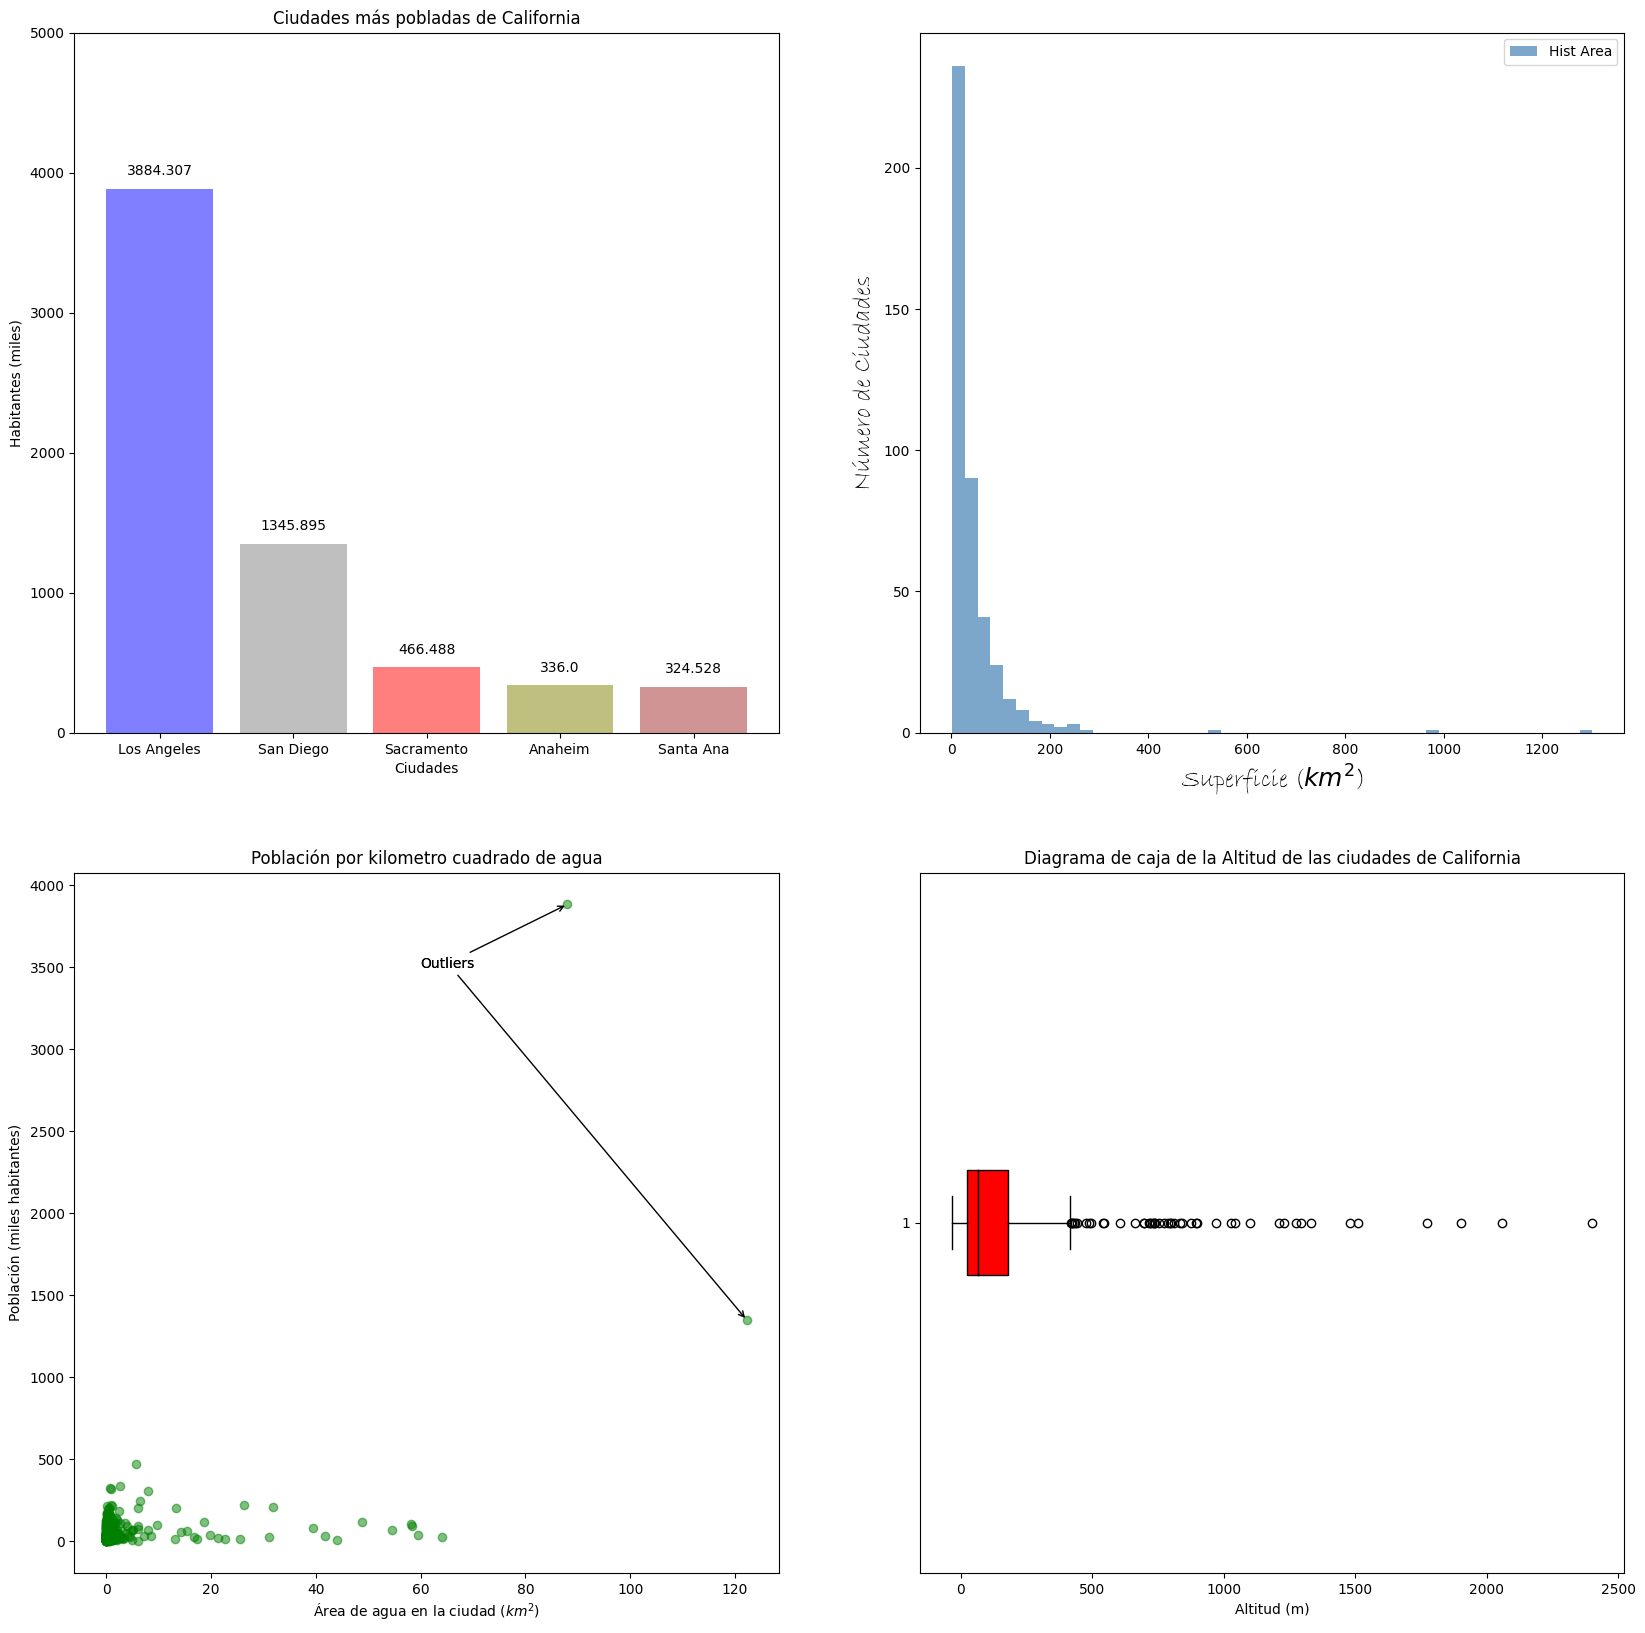

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [109]:
fig.savefig("./data/my_figure.png")

